## *Practical execution of simple linear regression



In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df=pd.read_csv('weight_height_data.csv')

In [4]:
df.head()

,Weight_kg,Height_cm
0,88,100.6
1,78,97.6
2,64,76.8
3,92,113.4
4,57,63.4


Text(0.5, 0, 'Weight (kg)')

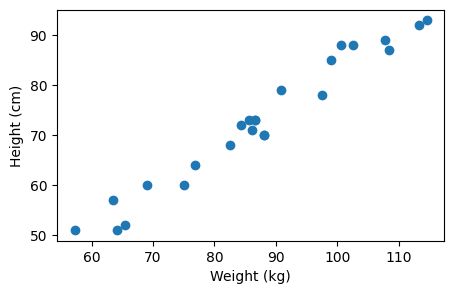

In [5]:
## Plot scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(df['Height_cm'], df['Weight_kg'])
plt.ylabel('Height (cm)')
plt.xlabel('Weight (kg)')



In [6]:
## finding the correlation
df.corr()

,Weight_kg,Height_cm
Weight_kg,1.00000,0.98086
Height_cm,0.98086,1.00000


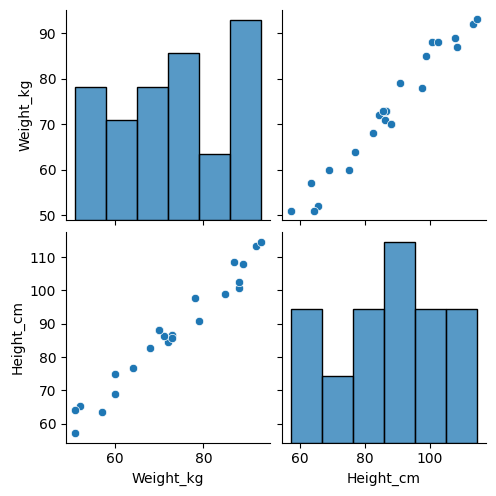

In [7]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)
plt.gcf().set_size_inches(5, 5)  


In [8]:
## Independent and dependent features
X = df[['Weight_kg']] ## independent feature should be in dataframe or in 2 dimensional array {like-(24,1)}
y = df['Height_cm'] ## dependent feature should be in 1 dimensional array


In [9]:
x_series=df['Weight_kg'] # when we use single bracket it basically converts the data into a series or 1 dimensional array and we dont need that its gives errors
np.array(x_series).shape

(24,)

In [10]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
## Standardization applying z-score (mean=0, std=1) on  independent features X
from sklearn.preprocessing import StandardScaler


In [12]:
scaler = StandardScaler()
x_train=scaler.fit_transform(X_train)
    ## we only use transform on test data not fit_transform 
                                    ## because we dont want to change the mean and std of test data and the 
                                    # data should be leak for test data

In [13]:
x_test=scaler.transform(X_test)  

In [14]:
x_test

array([[-0.04322242],
       [-0.11395002],
       [ 1.08841915],
       [ 0.02750518],
       [ 0.02750518],
       [-0.8919536 ]])

In [15]:
## Apply Linear Regression
from sklearn.linear_model import LinearRegression    

In [16]:
regression=LinearRegression(n_jobs=-1) ## n_jobs=-1 means use all processors

In [17]:
regression.fit(x_train, y_train) ## fit the model on training data

LinearRegression(n_jobs=-1)

In [18]:
print('This is our coefficient or slope:',regression.coef_) ## slope of the line  its done by formula y^=B0+B1*x1 Y^ is prdicted value B0 is intercept and B1 is slope x1 is input feature our weight
print('This is our intercept:',regression.intercept_)

This is our coefficient or slope: [17.57838399]
This is our intercept: 87.52222222222221


##### The 1 unit movement in our weight(input feature) leads to 17.57 unit movement in out height(output feature).
##### The intercept is where the bestfit line cuts y axis (y intercept).

Text(0, 0.5, 'Height (cm)')

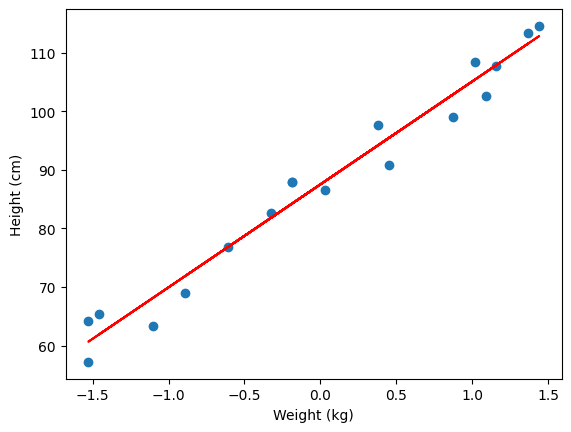

In [19]:
## plot traning data point  best fit line 
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train), color='red') ## best fit line
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')

In [20]:
## prediction for test data
y_pred=regression.predict(x_test) ## this will give us the predicted value for test data

### prediction of data
#### 1. predicted height output= intercept + coeffi_(weight)
#### 2. Y_pred_test=86.52+17.57(X_text)

In [21]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
mse=mean_squared_error(y_test, y_pred) ## mean squared error
mae=mean_absolute_error(y_test, y_pred) ## mean absolute error
rmse=np.sqrt(mse) ## root mean squared error
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('Mean Squared Error:', mse)   


Mean Absolute Error: 2.6777444971102398
Root Mean Squared Error: 3.173735061625143
Mean Squared Error: 10.072594241388751


### R square 
##### formula :  R^2=1-ssr/sst
##### R^2 = coefficient of determination ssr = sum of residuals , sst= total sum of squares


In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred) ## r squared score
score


0.8203033853225127

#### Formula for Adjusted R-Squared
##### adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

##### Components:
##### r2 = R-squared (coefficient of determination)
##### n = Number of observations (data points)
##### k = Number of independent variables (predictors)


In [24]:
## Display ajusted r squared score
1-((1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)) ## adjusted r squared score

0.7753792316531408

________________________________________________________________________________________________________________________

# linear regression using OLS

In [25]:
import statsmodels.api as sm

In [26]:
model=sm.OLS(y_train, X_train).fit() ## OLS is ordinary least square

In [27]:
predictions = model.predict(X_test)  ## Get predicted values
print(predictions)  


8      86.885355
16     85.678614
0     106.193212
18     88.092097
11     88.092097
9      72.404463
dtype: float64


In [28]:
print(model.summary()) ## this will give us the summary of the model

                                 OLS Regression Results                                
Dep. Variable:              Height_cm   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.336e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):                    4.63e-26
Time:                        19:20:53   Log-Likelihood:                         -46.389
No. Observations:                  18   AIC:                                      94.78
Df Residuals:                      17   BIC:                                      95.67
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/saketsmac/saket_udemy_ml/venv/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [29]:
## prediction for new data
regression.predict(scaler.transform([[70]])) 

/Users/saketsmac/saket_udemy_ml/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.27588816])